**<span style="font-size:24px">Libraries</span>**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


**<span style="font-size:24px">Data</span>**

In [2]:
data_days = pd.read_csv("taxi_trip_pricing.csv", usecols=["Trip_Distance_km", "Trip_Price","Day_of_Week"])
data_weather=pd.read_csv("taxi_trip_pricing.csv", usecols=["Trip_Distance_km", "Trip_Price","Weather"])

data_days.dropna(inplace=True)
data_days.reset_index(inplace=True, drop=True)

data_weather.dropna(inplace=True)
data_weather.reset_index(inplace=True,drop=True)


data_days["Trip_Distance_km"] = data_days["Trip_Distance_km"].astype(float)
data_days["Trip_Price"] = data_days["Trip_Price"].astype(float)

data_weather["Trip_Distance_km"] = data_weather["Trip_Distance_km"].astype(float)
data_weather["Trip_Price"] = data_weather["Trip_Price"].astype(float)

<span style="font-size:24px">Bar plot: **<span style="font-size:24px">Average Price per Kilometer by Day Type</span>**

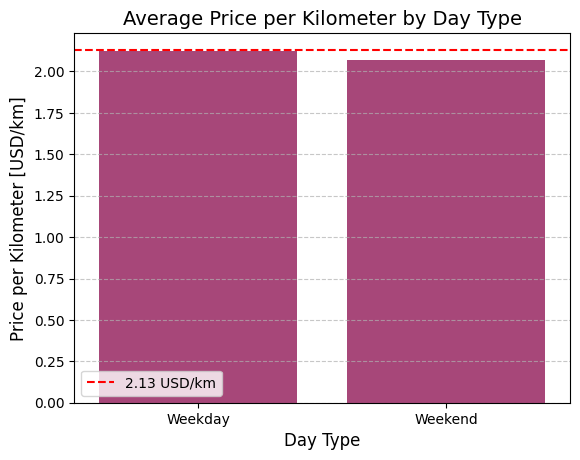

In [3]:
avg_price_per_km_by_day_of_week = (
    data_days.groupby("Day_of_Week")
    .apply(lambda group: group["Trip_Price"].sum() / group["Trip_Distance_km"].sum())
    .reset_index(name="Price_per_km")
)

sns.barplot(
    x="Day_of_Week", 
    y="Price_per_km", 
    data=avg_price_per_km_by_day_of_week,
    color=sns.color_palette("magma", n_colors=1)[0]
)
plt.axhline(y=2.13, color='red', linestyle='--', label='2.13 USD/km')
plt.legend()
plt.title("Average Price per Kilometer by Day Type", fontsize=14)
plt.xlabel("Day Type", fontsize=12)
plt.ylabel("Price per Kilometer [USD/km]", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<span style="font-size:24px">Bar plot: **<span style="font-size:24px">Average Price per Kilometer by Weather Type</span>**

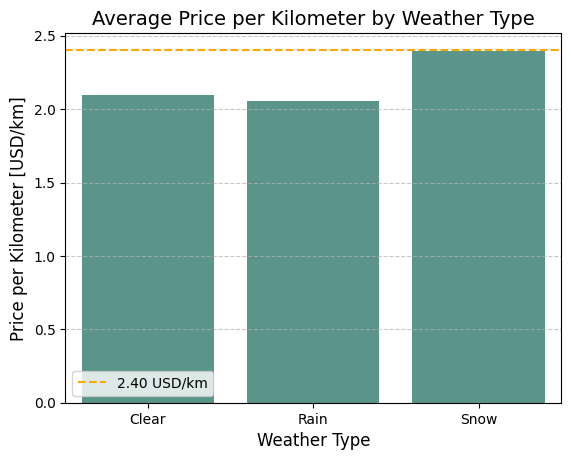

In [4]:
avg_price_per_km_by_weather = (
    data_weather.groupby("Weather")
    .apply(lambda group: group["Trip_Price"].sum() / group["Trip_Distance_km"].sum())
    .reset_index(name="Price_per_km")
)
sns.barplot(
    x="Weather", 
    y="Price_per_km",
    
    data=avg_price_per_km_by_weather,
    color=sns.color_palette("crest", n_colors=2)[0]
)
plt.axhline(y=2.40, color='orange', linestyle='--', label='2.40 USD/km')
plt.legend(loc='lower left')
plt.title("Average Price per Kilometer by Weather Type", fontsize=14)
plt.xlabel("Weather Type", fontsize=12)
plt.ylabel("Price per Kilometer [USD/km]", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
